In [11]:
import numpy as np
import pandas as pd
import functions as func
import AOR_Pipeline as pipeline
import matplotlib.pyplot as plt
import mirpyidl as idl
import glob, pdb
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

## Testing Markdown Language

### Title
- ordinary list item

- list item 1
 - indented list item

* ### title list item

## Getting mikaela's aor list

In [74]:
mklaList = ascii.read('../michaela_work/aors')
mklaList

AORKEY,StarName
str9,str14
r40398848,HD195725
r40399104,HIP43760
r40399360,HD043587
r40399616,HIP72875
r40399872,HD028527
r40400128,HD206893
r40400384,HIP30953
r40400640,HIP96113
r40400896,HIP63894


In [107]:
mklaCrd = ascii.read('../michaela_simbadSearch.csv', delimiter = ';', guess=False, fast_reader=False)
mklaCrd

col1,col2,col3,col4,col5,col6,col7,col8,col9,coll0,coll1,coll2,coll3
int64,str14,str23,str3,str39,str6,str6,str6,str6,str5,str17,int64,int64
1,HD195725,* tet Cep,SB*,20 29 34.8651841062 +62 59 38.621587534,4.58,4.42,4.22,4.05,3.96,A7III,140,0
2,HIP43760,HD 76748,PM*,08 54 51.2042570043 -63 42 06.989698801,~,10.29,9.44,~,~,K0V,16,0
3,HD043587,HD 43587,SB*,06 17 16.1298959119 +05 05 59.915616770,6.400,6.290,5.700,5.3,5.1,G0V,193,0
4,HIP72875,HD 131582,PM*,14 53 41.5724163105 +23 20 42.804733565,10.363,9.601,8.608,8.046,7.545,K3V,49,0
5,HD028527,HD 28527,dS*,04 30 33.6330527888 +16 11 38.462112418,~,4.975,4.764,6.52,~,A6IV,169,0
6,HD206893,HD 206893,PM*,21 45 21.9056012837 -12 47 00.068065895,~,7.11,6.67,~,~,F5V,45,0
7,HIP30953,HR 2384,**,06 29 49.06454 -50 14 20.6831,~,5.63,5.22,~,~,F2V,61,1
8,HIP96113,HD 183783,PM*,19 32 30.2696891082 -35 27 06.210642957,10.74,9.742,8.645,7.992,7.461,K4+V,29,0
9,HIP63894,HD 113827,PM*,13 05 41.4079243751 +49 28 18.965241178,~,10.44,9.391,9.074,8.0,K4V,29,0


In [14]:
aorkeys = np.array(mklaList['AORKEY'])
row = Table(aorkeys.T)
ascii.write(row, 'michaela_aorkeys.txt', delimiter = ',', overwrite = False)

In [79]:
stNames = mklaList['StarName']
ascii.write(stNames.T, 'michaela_StarNames.csv', overwrite = True)

In [35]:
a = glob.glob('/data1/phot_cal/spitzer/michaela/r*')
len(a)

1444

## Getting Taurus Data

In [2]:
taurus = ascii.read('Taurus_votable.vot')
ascii.write(taurus['col1'], 'taurus_aorkeys.txt', delimiter = ',', overwrite = True)

In [4]:
tau_stars = pd.read_html('http://iopscience.iop.org/article/10.1088/0067-0049/186/1/111/meta')
tau_stars[0]

,0,1,2,3,4,5,6,7
0,3963904,37,2004 Feb 9,04 46 42.3 +24 58 58,04 46 42.3 +24 58 58,5.3 × 5.3,85.0,31.2 HDR
1,Â,Â,Â,04 46 46.6 +24 52 21,04 46 38.5 +25 05 43,5.3 × 5.3,85.0,31.2 HDR
2,Â,Â,Â,04 44 31.0 +25 12 21,04 44 31.0 +25 12 21,5.3 × 5.3,85.0,31.2 HDR
3,Â,Â,Â,04 44 34.9 +25 05 50,04 44 27.2 +25 19 06,5.3 × 5.3,85.0,31.2 HDR
4,Â,Â,Â,04 43 03.4 +25 20 10,04 43 03.4 +25 20 10,5.3 × 5.3,85.0,31.2 HDR
5,Â,Â,Â,04 43 07.2 +25 13 44,04 43 00.0 +25 26 56,5.3 × 5.3,85.0,31.2 HDR
6,Â,Â,Â,04 42 38.0 +25 15 29,04 42 38.0 +25 15 29,5.3 × 5.3,85.0,31.2 HDR
7,Â,Â,Â,04 42 41.4 +25 08 54,04 42 34.1 +25 22 14,5.3 × 5.3,85.0,31.2 HDR
8,Â,Â,Â,04 42 21.5 +25 20 26,04 42 21.5 +25 20 26,5.3 × 5.3,85.0,31.2 HDR
9,Â,Â,Â,04 42 24.8 +25 13 53,04 42 17.7 +25 27 11,5.3 × 5.3,85.0,31.2 HDR


In [2]:
a = glob.glob('/data1/phot_cal/spitzer/taurus/r*')
len(a)

180

## Getting Upper Sco data

In [73]:
upSco_stars = ascii.read('../aorByProgramID.tbl-2.txt')
upSco_stars

Target_name,RA(J2000),Dec(J2000),Instrument/Mode,AORKEY,AOR_label,Observation_start_time,Observation_end_time
str29,float64,float64,str8,int64,str12,str19,str19
CarpIracC001,241.359375,-19.805167,IRAC Map,13856000,CarpIracC001,2006-03-25 02:13:35,2006-03-25 02:28:57
CarpIracC005,242.998917,-19.460583,IRAC Map,13857024,CarpIracC005,2006-03-29 16:20:15,2006-03-29 16:39:15
CarpIracC009,237.744792,-25.751278,IRAC Map,13858048,CarpIracC009,2006-03-28 14:25:13,2006-03-28 14:36:09
CarpIracC011,238.474667,-24.533111,IRAC Map,13858560,CarpIracC011,2006-03-28 14:37:10,2006-03-28 14:44:10
CarpIracC018,238.673333,-22.76625,IRAC Map,13860352,CarpIracC018,2006-03-25 01:40:26,2006-03-25 01:55:51
CarpIracC022,240.481125,-21.980444,IRAC Map,13861376,CarpIracC022,2006-03-25 02:30:24,2006-03-25 02:41:36
CarpIracC047,239.622125,-21.401111,IRAC Map,13867776,CarpIracC047,2006-03-25 02:42:46,2006-03-25 02:54:20
CarpIracC051,237.499167,-25.150944,IRAC Map,13868800,CarpIracC051,2006-03-28 14:17:41,2006-03-28 14:21:58
CarpIracC055,239.552958,-23.476778,IRAC Map,13869824,CarpIracC055,2006-03-28 14:45:20,2006-03-28 14:59:23


In [4]:
a = glob.glob('/data1/phot_cal/spitzer/upperSco/r*')
len(a)

246

## Working with Subarray Mode (Comparing with full)

In [32]:
full = fits.open('/data1/phot_cal/spitzer/hd165459/cryo/r11638016/ch1/bcd/SPITZER_I1_11638016_0000_0000_6_bcd.fits')
fImg = full[0].data
fHdr = full[0].header
full.close()

(130.20538565683137, numpy.float64)

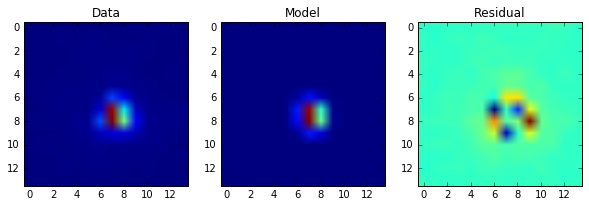

In [50]:
targetCrd = SkyCoord('18 02 30.7410086899 +58 37 38.157415821', unit=(u.hourangle, u.deg))
w = WCS(fHdr)
pix = targetCrd.to_pixel(w)
x, y, _, _ = func.gen_center_g2d(fImg, pix[0], pix[1], 7, 5, 4, 4, 0, model_plotting=True)
x, type(y)

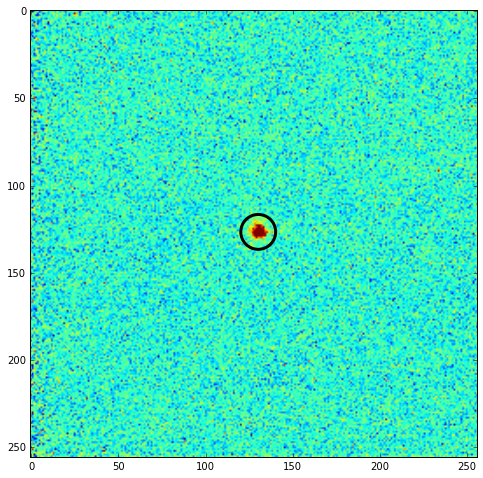

In [54]:
plt.imshow(fImg, vmin = -20, vmax = 30)
flux, ap = func.photometry(fImg, [x], [y], rad = 10)
ap.plot(color = 'k', lw = 3)

In [57]:
fHdr['READMODE']

'FULL'

In [28]:
sub = fits.open('/data1/phot_cal/spitzer/michaela/r40398848/ch1/bcd/SPITZER_I1_40398848_0000_0000_2_sub2d.fits')
sImg = sub[0].data
sHdr = sub[0].header
sub.close()

In [29]:
sHdr['READMODE']

'SUB'

In [109]:
targetCrd

<SkyCoord (ICRS): (ra, dec) in deg
    ( 270.62808754,  58.62726595)>

(13.77937579202173, numpy.float64)

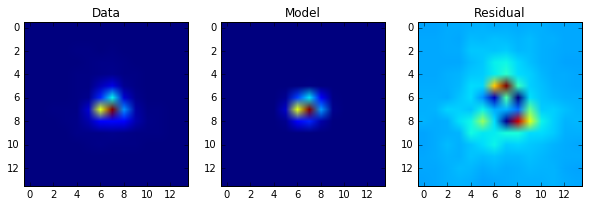

In [112]:
targetCrd = SkyCoord('20 29 34.8651841062 +62 59 38.62158753457415821', unit=(u.hourangle, u.deg))

w = WCS(sHdr)
pix = targetCrd.to_pixel(w)
# w.all_world2pix(270.63, 58.63, 1, tolerance = 10**(-1))
x, y, _, _ = func.gen_center_g2d(sImg, pix[0], pix[1], 7, 5, 4, 4, 0, model_plotting=True)
x, type(y)

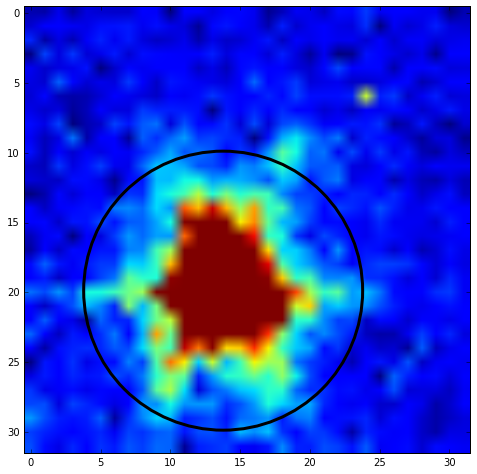

In [120]:
plt.imshow(sImg, vmin = -10, vmax = 300)
flux, ap = func.photometry(sImg, [x], [y], rad = 10)
ap.plot(color = 'k', lw = 3)

## IDL flags

In [9]:
run5 = pd.read_csv('Reduction_Data_&_Logs/run5_img_data.csv').dropna() # dropna() drops all the rows that has a nan
run5.head()

,File#,Coord Conversion Issue,Centroiding Issue,Bad Center Guess,Not In FOV,Xc,Yc,Fx,Fy,Time[MJD],Raw_Flux,Bkg_Flux,Res_Flux
0,1,X,X,X,X,130.205386,126.525119,1.705805,1.409706,53204.958969,18112.455958,103.654308,18008.801649
2,3,X,X,X,X,68.043207,189.838214,1.384366,1.272752,53204.959460,18593.488133,139.410034,18454.078099
4,5,X,X,X,X,193.136452,189.134014,1.074962,1.598744,53204.959890,18693.628874,136.290511,18557.338363
6,7,X,X,X,X,193.026841,63.109090,1.584642,1.158655,53204.960358,18957.188451,193.046632,18764.141819
8,9,X,X,X,X,67.051194,63.484199,1.698030,1.465966,53204.960839,18716.524479,175.240946,18541.283533


In [30]:
idl.setVariable('cenX', np.array(run5['Xc']))
idl.setVariable('cenY', np.array(run5['Yc']))
idl.setVariable('obsFlux', np.array(run5['Res_Flux']))
idl.setVariable('ch', 1)
idl.execute('warmFlux = IRAC_APHOT_CORR(obsFlux, cenX, cenY, ch)')
warm_corr = idl.getVariable('warmFlux')
idl.execute('wFlux = IRAC_APHOT_CORR(obsFlux, cenX, cenY, ch, /WARM)')
wCorr = idl.getVariable('wFlux')
idl.execute('cryoFlux = IRAC_APHOT_CORR(obsFlux, cenX, cenY, ch, /CRYO)')
cryo_corr = idl.getVariable('cryoFlux')
idl.execute('cFlux = IRAC_APHOT_CORR_CRYO(obsFlux, cenX, cenY, ch)')
cCorr = idl.getVariable('cFlux')

In [32]:
comp = Table()
comp['corr_def'] = warm_corr
comp['corr_/WARM'] = wCorr
comp['corr_/CRYO'] = cryo_corr
comp['cryo_def'] = cCorr
comp['/WARM_warm'] = comp['corr_def'] == comp['corr_/WARM']
comp['warm_/CRYO'] = comp['corr_def'] == comp['corr_/CRYO']
comp['/CRYO_cryo'] = comp['corr_/CRYO'] == comp['cryo_def']
comp

corr_def,corr_/WARM,corr_/CRYO,cryo_def,/WARM_warm,warm_/CRYO,/CRYO_cryo
float64,float64,float64,float64,bool,bool,bool
18385.6352371,18385.6352371,18312.2299447,18312.2299447,True,False,True
18037.3491273,18037.3491273,18233.9779069,18233.9779069,True,False,True
17913.6565242,17913.6565242,18352.1801947,18352.1801947,True,False,True
18187.191383,18187.191383,18355.8786401,18355.8786401,True,False,True
18770.6212033,18770.6212033,18583.5797042,18583.5797042,True,False,True
18493.4809732,18493.4809732,18503.8180284,18503.8180284,True,False,True
18309.5641843,18309.5641843,18238.4908424,18238.4908424,True,False,True
18345.4889633,18345.4889633,18413.6743016,18413.6743016,True,False,True
18873.3526149,18873.3526149,18537.4445968,18537.4445968,True,False,True


In [34]:
fnames = glob.glob('/data1/phot_cal/spitzer/michaela/r40398848/ch1/bcd/*_sub2d.fits')
targetCrd = SkyCoord('20 29 34.8651841062 +62 59 38.62158753457415821', unit=(u.hourangle, u.deg))
data, hdr = func.single_target_phot(fnames, targetCrd, 10,12,20)
data

4it [00:01,  2.14it/s]


File#,Coord Conversion Issue,Centroiding Issue,Bad Center Guess,Not In FOV,Xc,Yc,Fx,Fy,Time[MJD],Raw_Flux,Bkg_Flux,Res_Flux
str25,str5,str5,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64
1,X,X,X,X,13.779375792,19.8773666267,1.77498107975,1.38142834748,55459.1630621,285388.94872,4851.55127895,280537.397441
2,X,X,X,X,14.1431702293,13.979868428,1.04879541986,1.48764606615,55459.1631968,289949.882097,2542.33887489,287407.543222
3,X,X,X,X,18.7561360504,9.42270465188,1.86070372868,1.83934541535,55459.1633076,270276.200583,2435.0462108,267841.154372
4,X,X,X,X,12.1861173314,15.3147018191,1.24549016038,1.75503660685,55459.1634197,279532.114343,1237.55736136,278294.556982


In [37]:
idl.setVariable('cenX', data['Xc'])
idl.setVariable('cenY', data['Yc'])
idl.setVariable('obsFlux', data['Res_Flux'])
idl.setVariable('ch', 1)
idl.execute('fwFlux = IRAC_APHOT_CORR(obsFlux, cenX, cenY, ch, /WARM)')
fw_corr = idl.getVariable('fwFlux')
idl.execute('fcFlux = IRAC_APHOT_CORR(obsFlux, cenX, cenY, ch, /CRYO)')
fc_corr = idl.getVariable('fcFlux')
idl.execute('swFlux = IRAC_APHOT_CORR(obsFlux, cenX, cenY, ch, /WARM, /SUBARRAY)')
sw_corr = idl.getVariable('swFlux')
idl.execute('scFlux = IRAC_APHOT_CORR(obsFlux, cenX, cenY, ch, /CRYO, /SUBARRAY)')
sc_corr = idl.getVariable('scFlux')

In [38]:
comp = Table()
comp['fw'] = fw_corr
comp['fc'] = fc_corr
comp['sw'] = sw_corr
comp['sc'] = sc_corr
comp['fw_sw'] = comp['fw'] == comp['sw']
comp['fc_sc'] = comp['fc'] == comp['sc']
comp['sw_sc'] = comp['sw'] == comp['sc']
comp

fw,fc,sw,sc,fw_sw,fc_sc,sw_sc
float64,float64,float64,float64,bool,bool,bool
275234.382723,274241.085893,270536.751069,274983.037056,False,False,False
267805.708381,274660.276489,264151.265489,276208.791346,False,False,False
272152.903975,267269.625522,269142.638367,269360.258644,False,False,False
269609.257022,272881.517951,265583.597513,274122.794151,False,False,False


## Pipeline Testing

In [112]:
reload(func)
reload(pipeline)

<module 'AOR_Pipeline' from 'AOR_Pipeline.py'>

In [146]:
aors = [glob.glob('/data1/phot_cal/spitzer/hd165459/cryo/r11638016/ch1/bcd/*_bcd.fits')]
crd = '270.62808754 58.62726595' #'18 02 30.7410086899 +58 37 38.157415821'

In [147]:
aor, img, prb = pipeline.run(aors, 'single deg', crd, 10,12,20,1.0,1.221,1,'n/a')



0it [00:00, ?it/s]


0it [00:00, ?it/s]


1it [00:00,  4.47it/s]


2it [00:00,  4.46it/s]


3it [00:00,  4.33it/s]


4it [00:00,  4.64it/s]


5it [00:01,  4.86it/s]


6it [00:01,  4.75it/s]


7it [00:01,  4.62it/s]


8it [00:01,  4.76it/s]


9it [00:01,  4.87it/s]


10it [00:02,  4.96it/s]




1it [00:02,  2.06s/it]



In [148]:
aor

AORKEY,DateObs,Mission,Read Mode,Cycling DPattern,DScale,DPosition,FTime (sec),Time (MJD),Flux (mJy),Error (mJy),Spread (%),Outliers Rejected
int32,str25,str5,str5,str5,str10,str5,float64,float64,float64,float64,float64,int32
11638016,2004-07-18T23:03:55.314,CRYO,FULL,NO,--,--,0.4,53204.9610569,643.623571906,4.08475965411,0.63465041251,0


In [149]:
img

File#,Coord Conversion Issue,Centroiding Issue,Bad Center Guess,Not In FOV,Xc,Yc,Fx,Fy,Time[MJD],Raw_Flux,Bkg_Flux,Res_Flux
str25,str5,str5,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64
1,X,X,X,X,130.205385659,126.525119494,1.70580515101,1.40970633664,53204.9589689,18112.4559577,103.654308261,18008.8016494
2,X,X,X,X,67.0511936798,63.4841993492,1.69802968637,1.46596619479,53204.9608393,18716.5244792,175.240946251,18541.2835329
3,X,X,X,X,193.026841505,63.1090902159,1.15865178185,1.5846442589,53204.9603579,18957.188456,193.046633893,18764.1418221
4,X,X,X,O,nan,nan,nan,nan,53204.9596819,nan,nan,nan
5,X,X,X,O,nan,nan,nan,nan,53204.9592097,nan,nan,nan
6,X,X,X,X,68.0432074168,189.83821351,1.38436840126,1.27274872558,53204.9594597,18593.4881681,139.410035051,18454.078133
7,X,X,X,X,193.13645238,189.134013889,1.07496157542,1.59874368622,53204.9598902,18693.6288737,136.290510639,18557.338363
8,X,X,X,O,nan,nan,nan,nan,53204.96058,nan,nan,nan
9,X,X,X,O,nan,nan,nan,nan,53204.9601125,nan,nan,nan


In [135]:
aors = [glob.glob('/data1/phot_cal/spitzer/michaela/r40398848/ch1/bcd/*_sub2d.fits')]
crd = '20 29 34.8651841062 +62 59 38.62158753457415821'

In [129]:
aor, img, prb = pipeline.run(aors, 'single hms', crd, 10,12,20,1.0,1.221,1,'n/a')



0it [00:00, ?it/s]


0it [00:00, ?it/s]


1it [00:00,  2.01it/s]


2it [00:00,  2.02it/s]


3it [00:01,  2.03it/s]


4it [00:01,  2.04it/s]




1it [00:02,  2.00s/it]



In [130]:
aor

AORKEY,DateObs,Mission,Read Mode,Cycling DPattern,DScale,DPosition,FTime (sec),Time (MJD),Flux (mJy),Error (mJy),Spread (%),Outliers Rejected
int32,str25,str5,str5,str5,str10,str5,float64,float64,float64,float64,float64,int32
40398848,2010-09-20T03:55:19.461,WARM,SUB,NO,medium,4,0.02,55459.1634197,9368.41718575,90.5683200189,0.966740893613,0


In [131]:
img

File#,Coord Conversion Issue,Centroiding Issue,Bad Center Guess,Not In FOV,Xc,Yc,Fx,Fy,Time[MJD],Raw_Flux,Bkg_Flux,Res_Flux
str25,str5,str5,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64
1,X,X,X,X,13.779375792,19.8773666267,1.77498107975,1.38142834748,55459.1630621,285388.94872,4851.55127895,280537.397441
2,X,X,X,X,14.1431702293,13.979868428,1.04879541986,1.48764606615,55459.1631968,289949.882097,2542.33887489,287407.543222
3,X,X,X,X,18.7561360504,9.42270465188,1.86070372868,1.83934541535,55459.1633076,270276.200583,2435.0462108,267841.154372
4,X,X,X,X,12.1861173314,15.3147018191,1.24549016038,1.75503660685,55459.1634197,279532.114343,1237.55736136,278294.556982


## Error Handling